C:\Anaconda\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


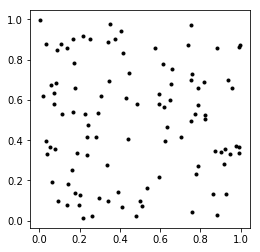

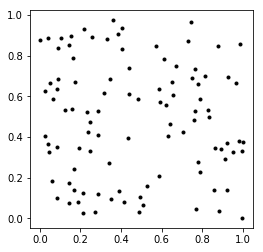

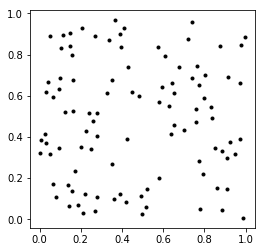

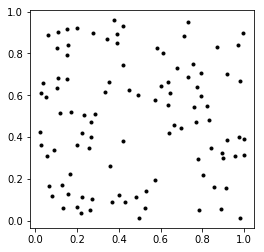

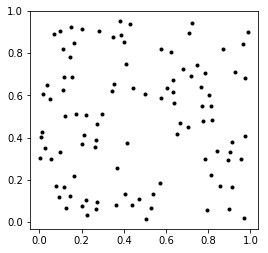

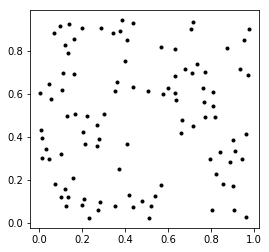

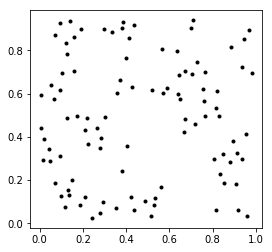

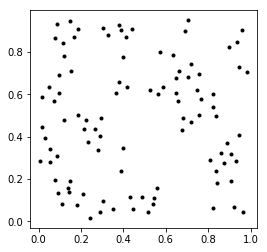

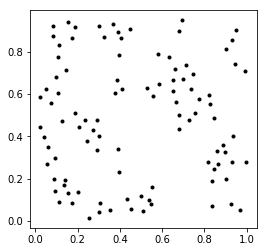

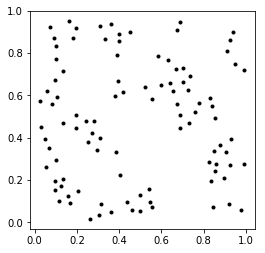

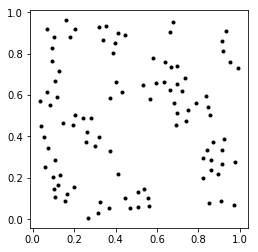

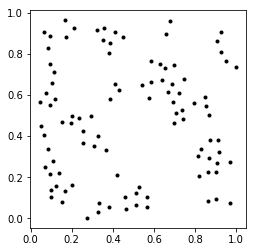

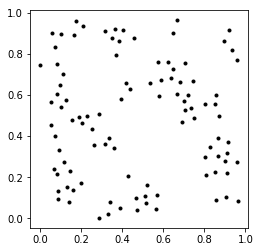

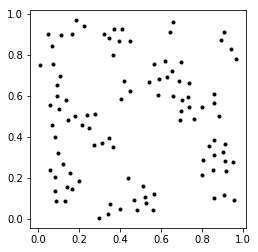

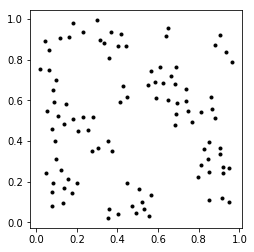

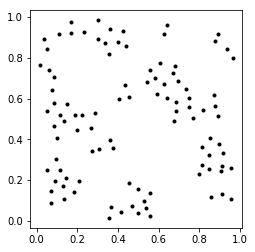

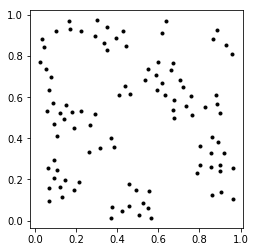

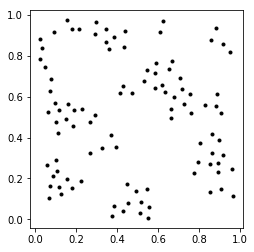

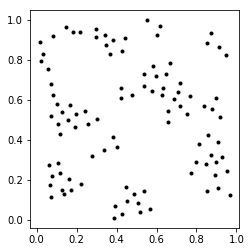

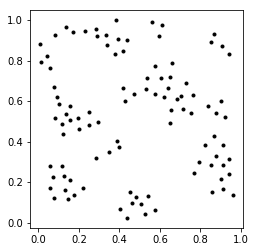

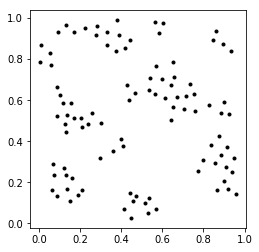

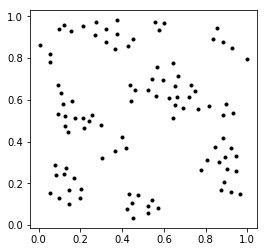

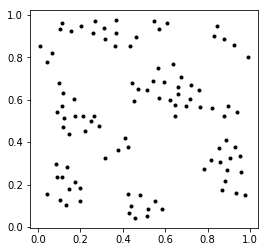

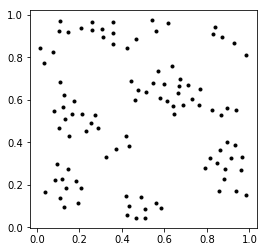

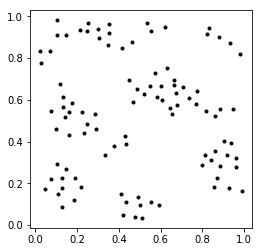

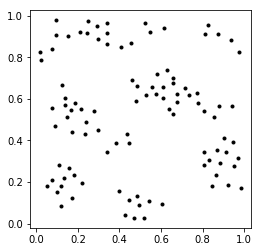

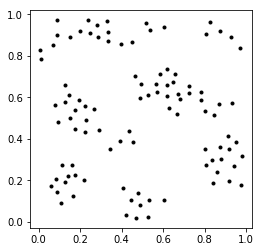

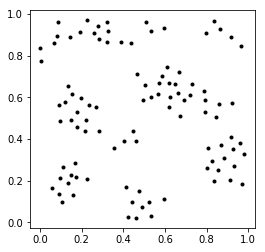

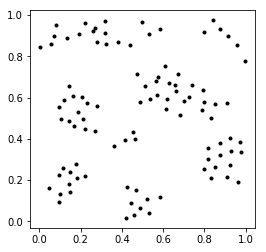

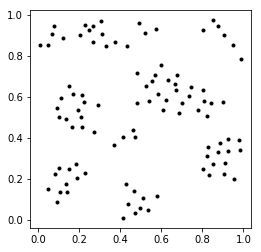

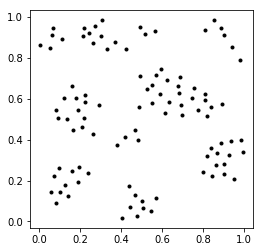

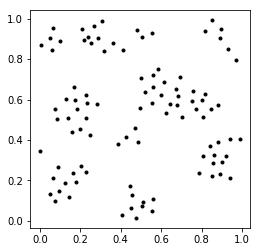

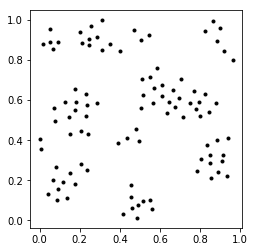

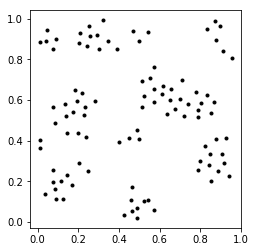

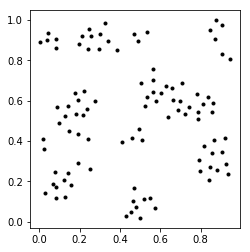

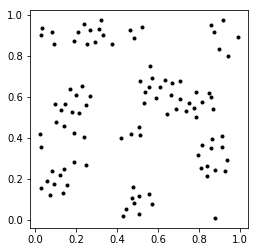

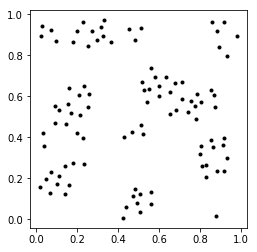

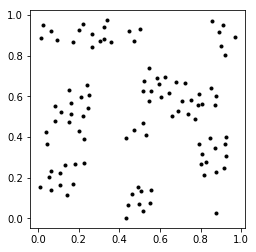

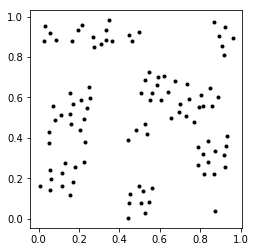

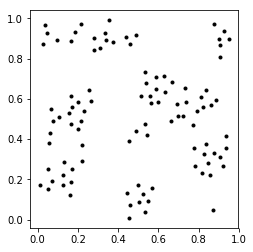

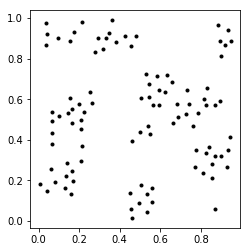

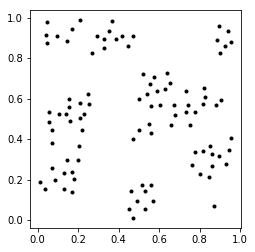

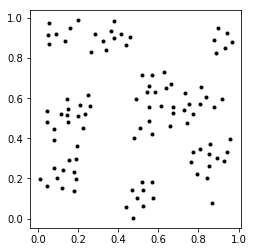

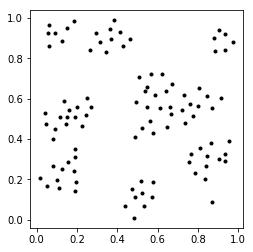

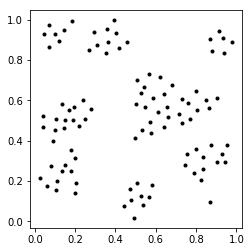

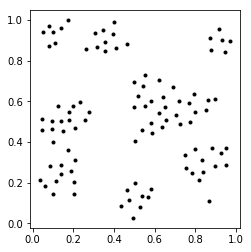

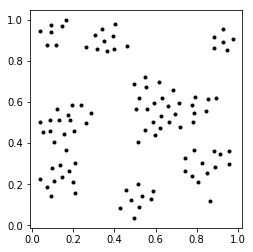

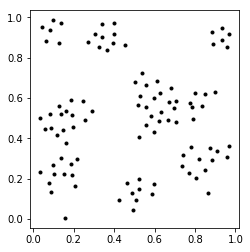

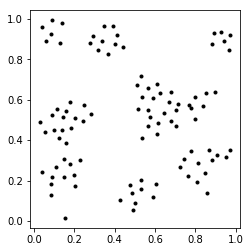

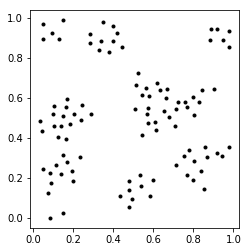

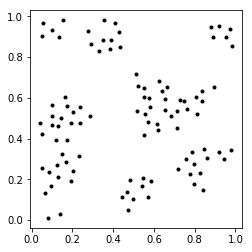

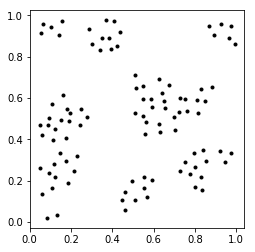

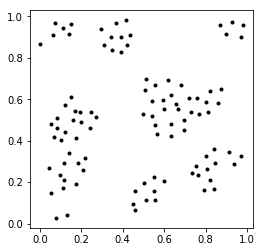

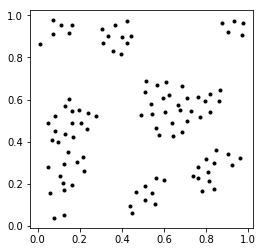

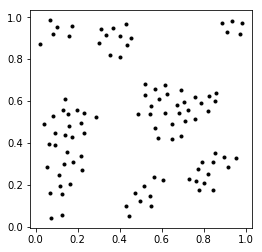

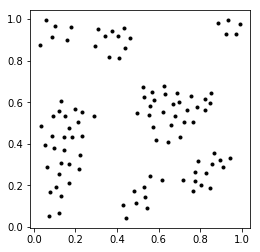

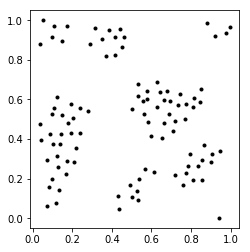

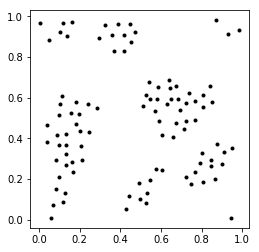

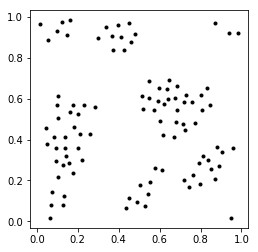

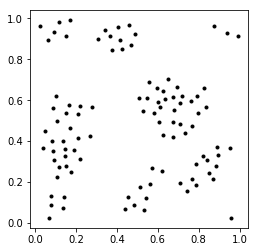

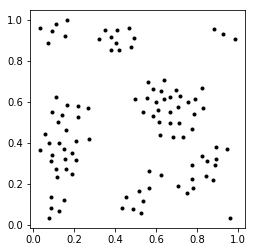

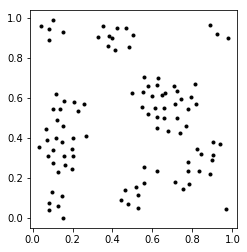

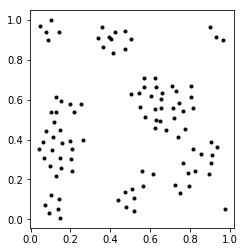

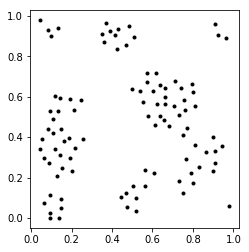

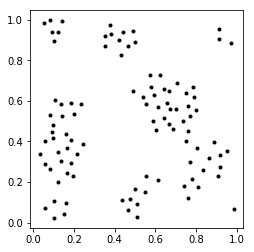

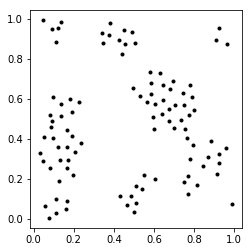

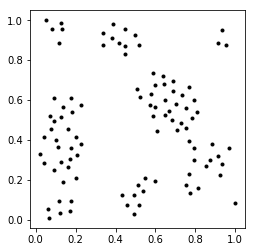

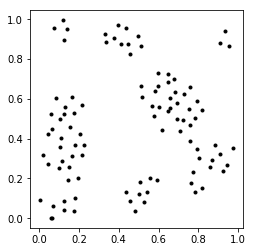

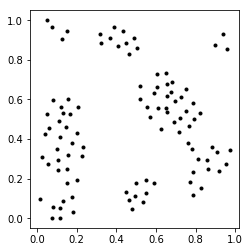

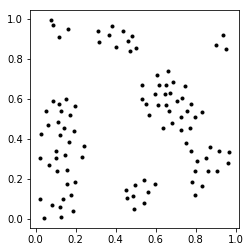

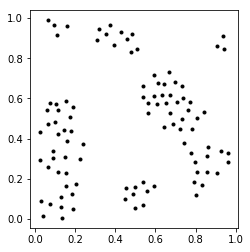

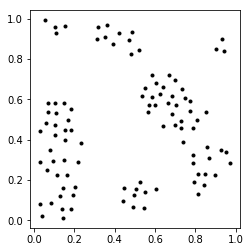

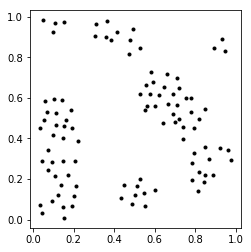

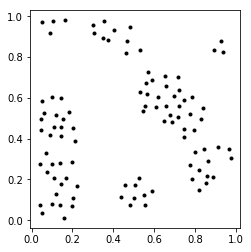

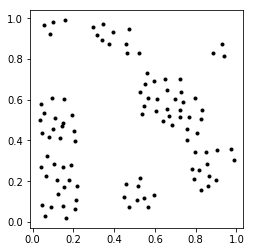

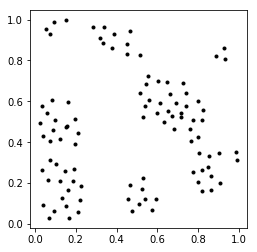

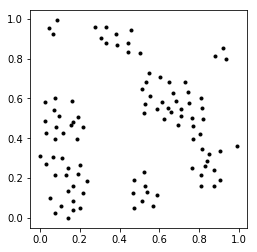

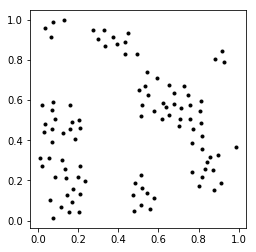

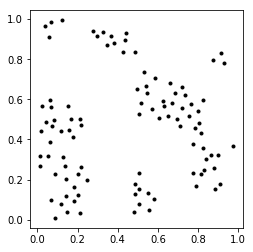

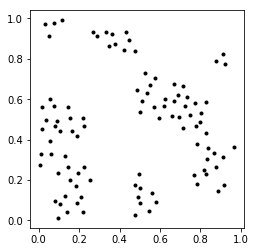

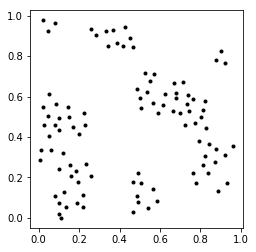

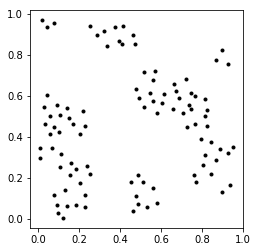

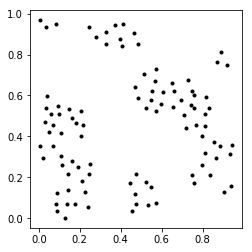

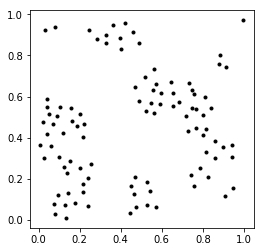

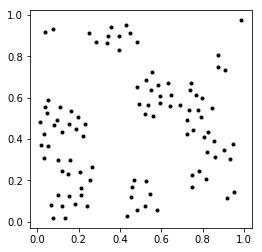

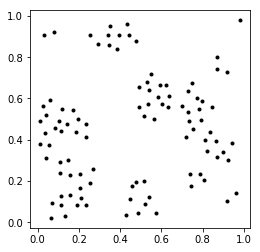

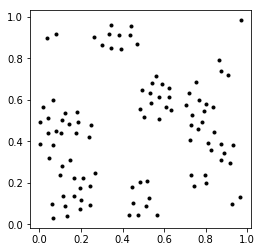

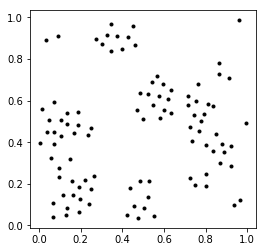

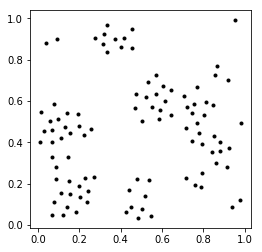

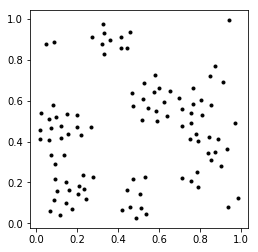

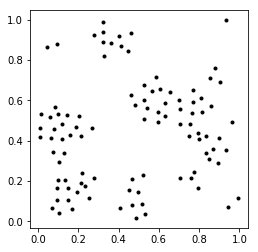

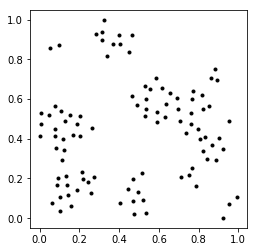

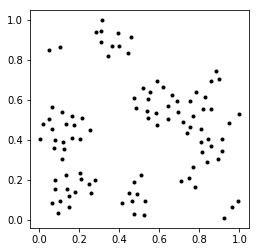

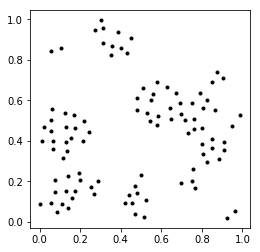

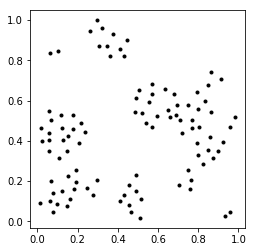

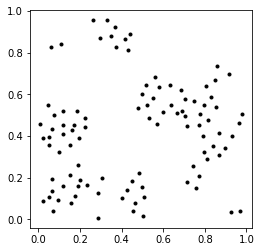

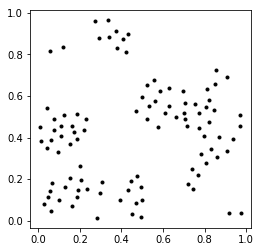

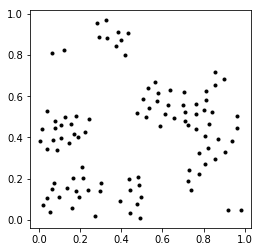

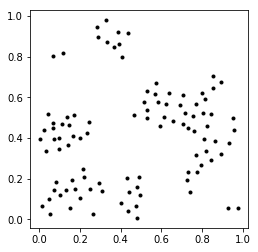

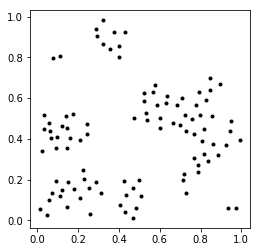

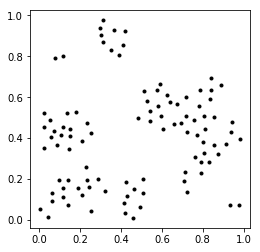

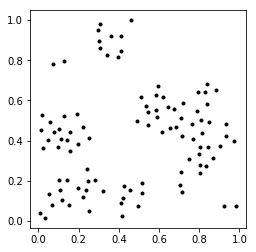

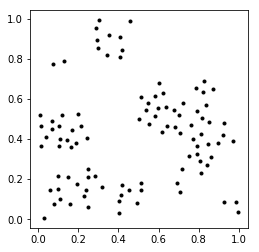

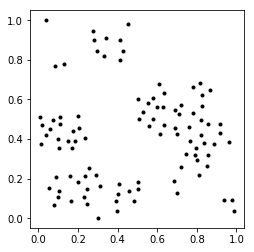

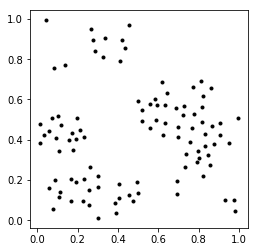

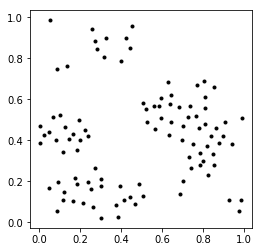

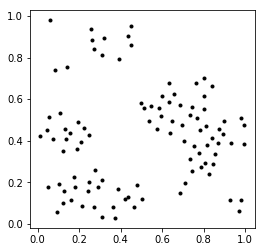

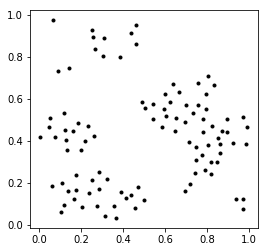

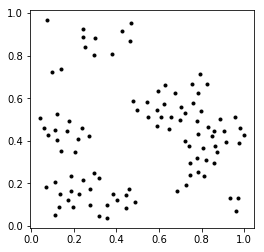

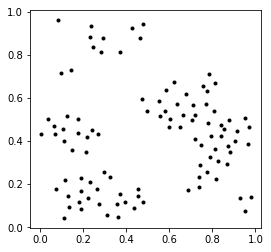

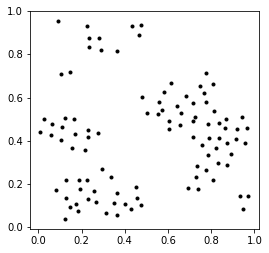

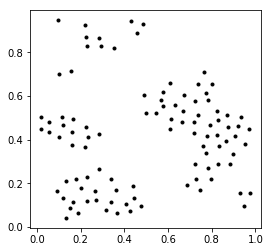

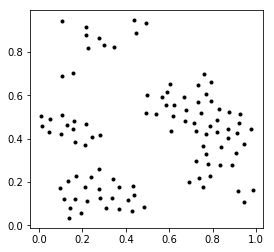

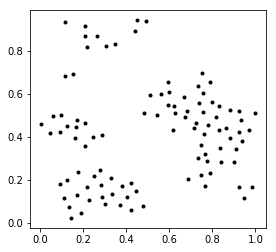

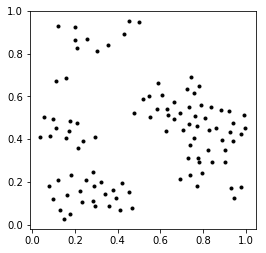

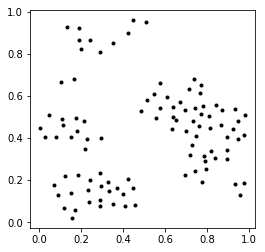

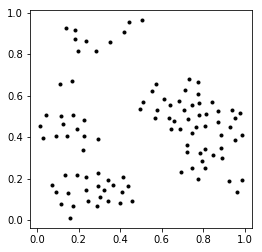

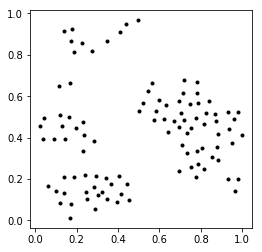

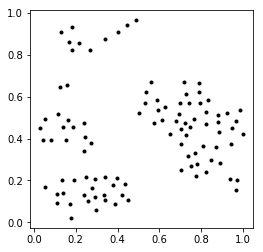

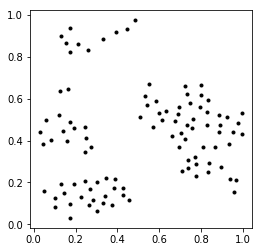

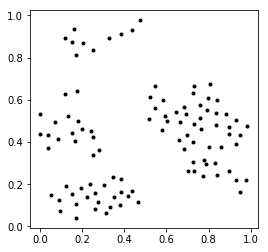

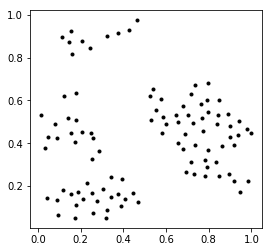

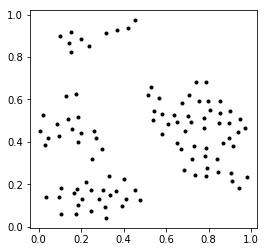

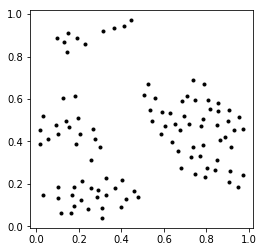

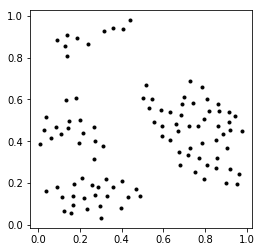

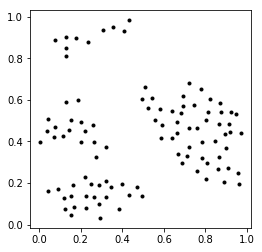

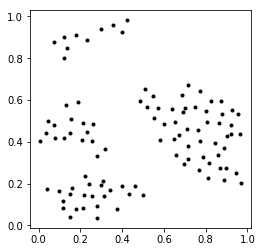

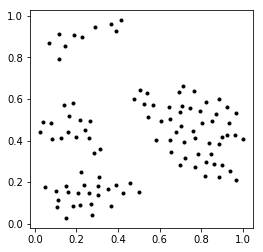

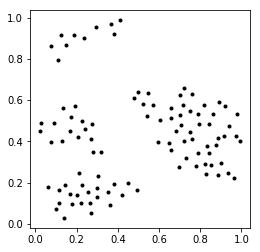

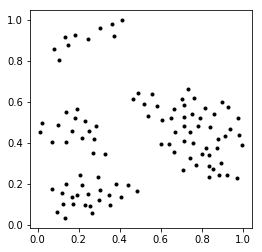

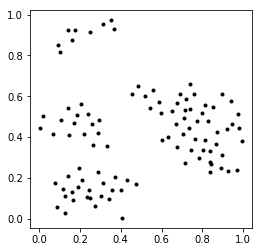

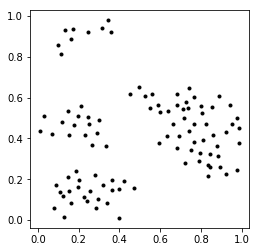

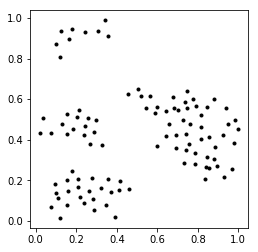

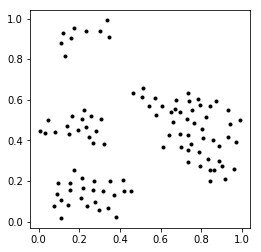

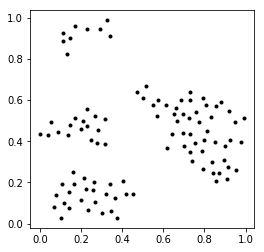

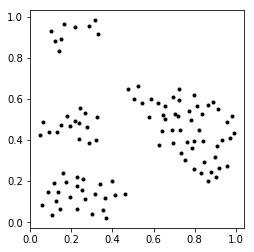

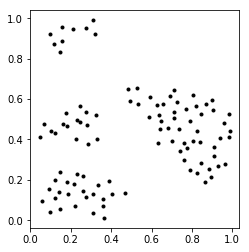

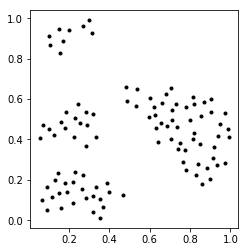

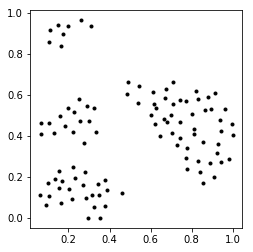

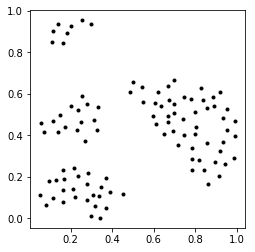

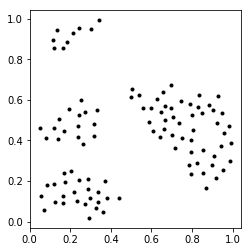

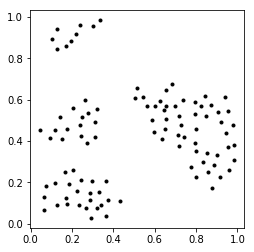

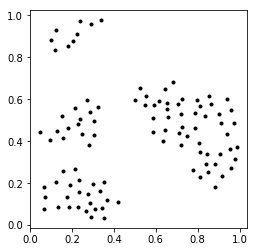

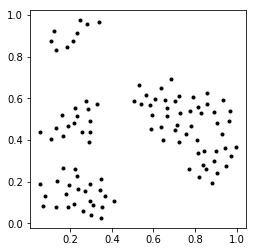

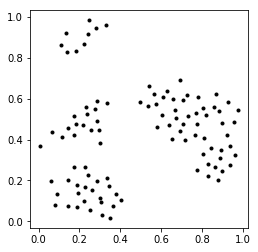

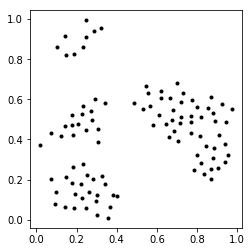

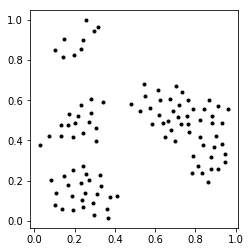

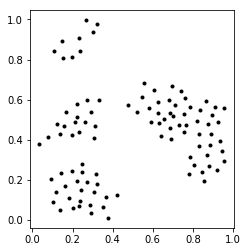

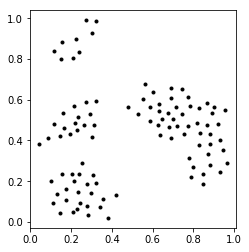

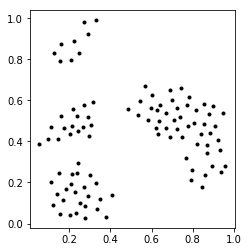

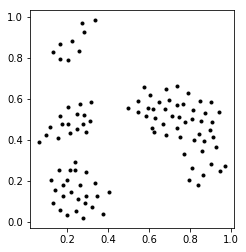

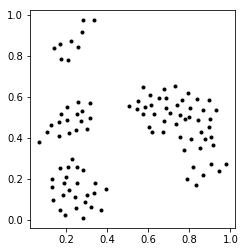

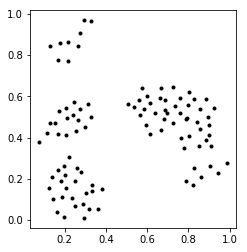

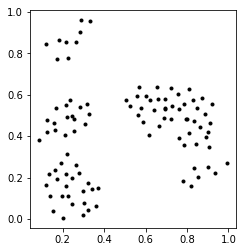

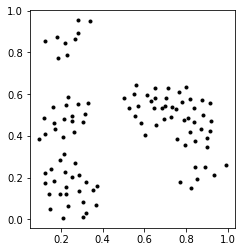

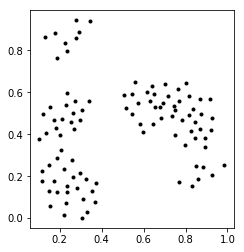

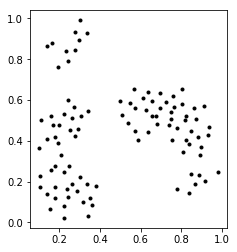

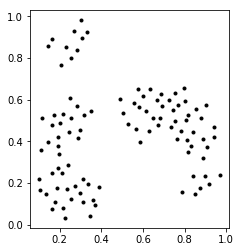

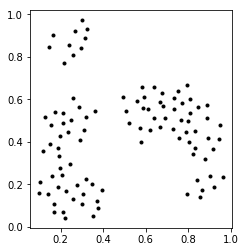

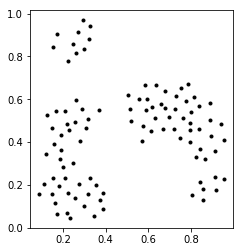

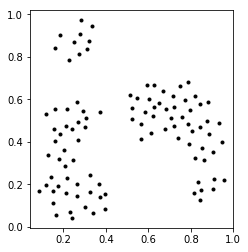

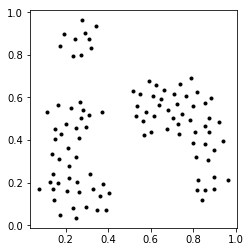

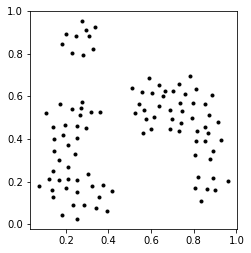

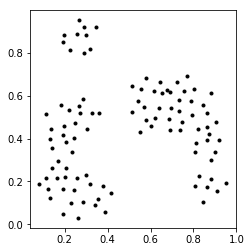

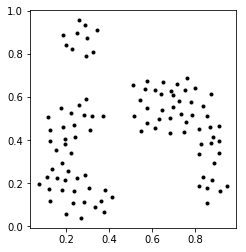

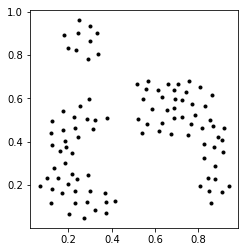

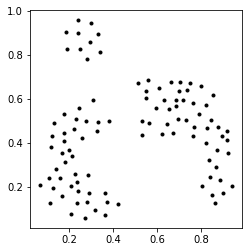

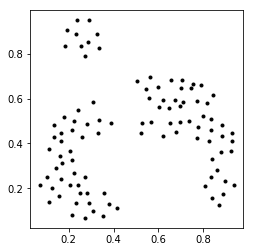

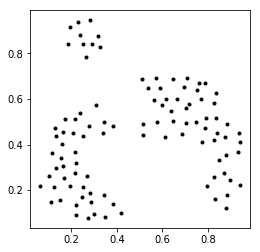

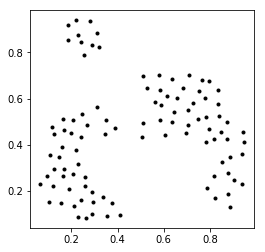

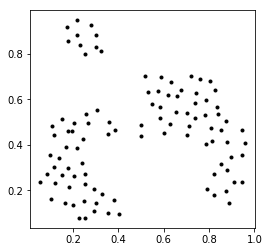

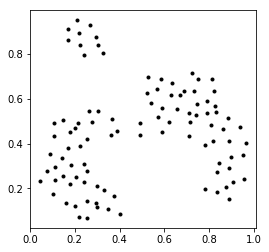

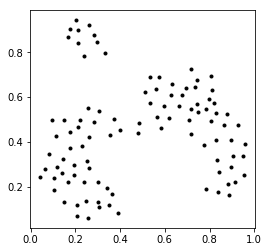

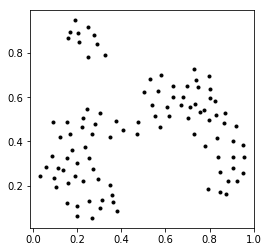

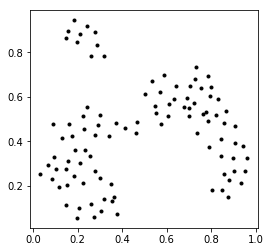

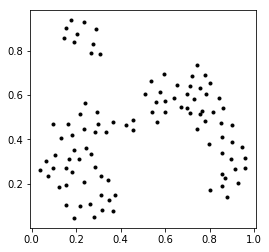

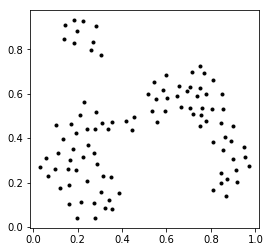

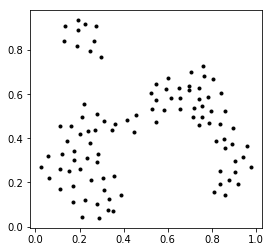

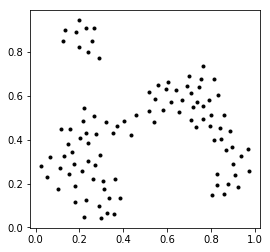

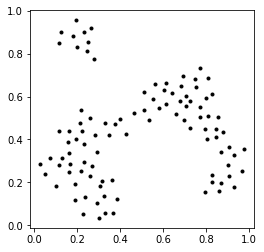

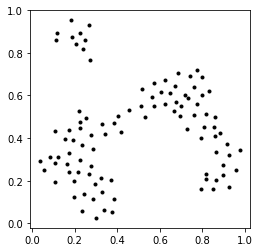

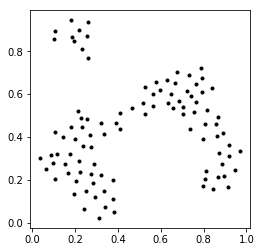

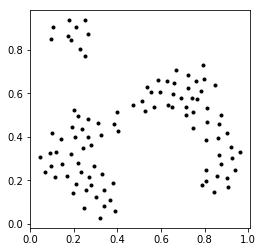

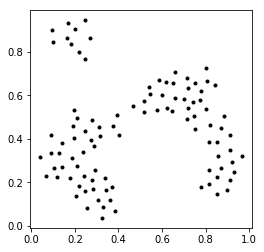

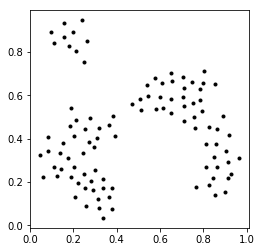

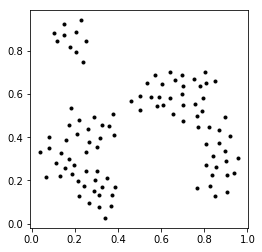

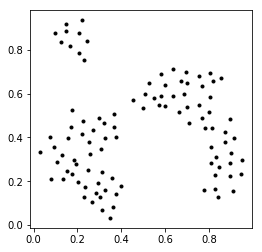

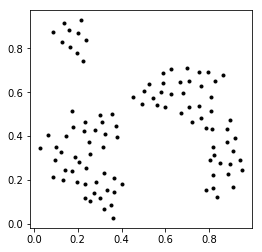

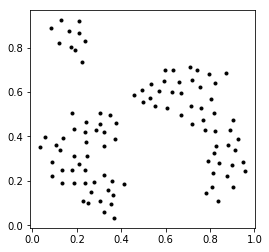

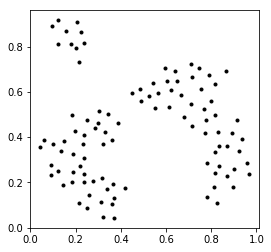

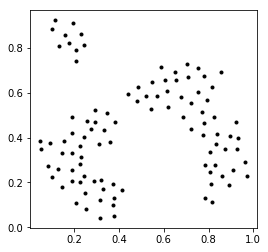

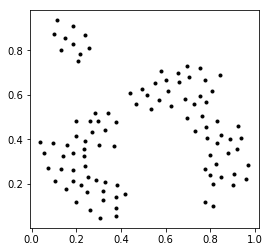

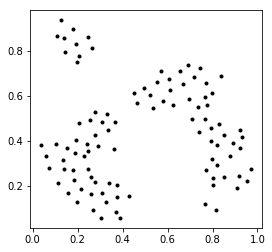

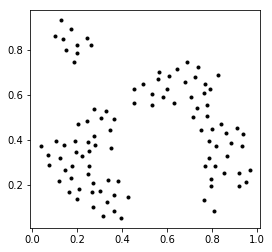

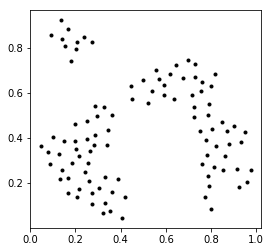

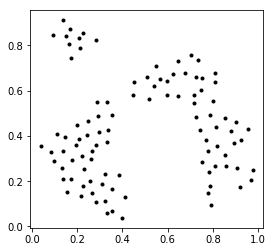

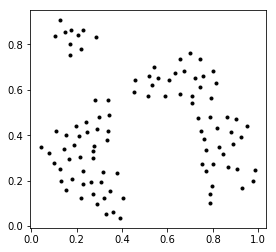

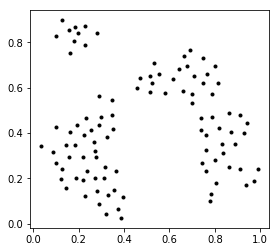

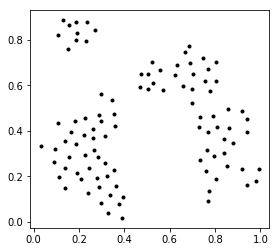

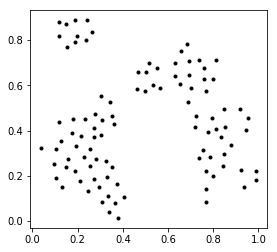

In [1]:
import numpy as np
from math import pi,atan2,cos,sin
import matplotlib.pyplot as plt

# number of individuals
N=100

# set to random initial conditions on (0,1)x(0,1)
xpos = np.random.uniform(0,1,N)
ypos = np.random.uniform(0,1,N)

# set to random inital headings
heading = np.random.uniform(0,2*pi,N)

repRad = 0.05
attRad = 0.1
align=0.5
turnRate = 1.0
visAngle = pi
# set speed individuals move
speed = 0.01

# run for this many time steps
TIMESTEPS = 200


def getHeading(i):
    c_angle = heading[i] #xpos[i]*2*pi + ypos[i]*2*pi 
    
    socx = 0
    socy = 0
    
    asocx = 0
    asocy = 0
    
    xdiffs = xpos - xpos[i]
    ydiffs = ypos - ypos[i]
    
    dists = np.sqrt(xdiffs**2+ydiffs**2)
    for j in range(N):
        if i==j:
            continue
        distij = dists[j]
        if distij < repRad:
            thisAngle = atan2(-ydiffs[j],-xdiffs[j])
            socx = socx + cos(thisAngle)
            socy = socy + sin(thisAngle)
        else:
            if distij < attRad:
                anglej = atan2(ydiffs[j],xdiffs[j])
                anglej = atan2(sin(anglej - c_angle),cos(anglej - c_angle))
                if anglej < visAngle and anglej> -visAngle:
                    headj = heading[j]-c_angle
                    relx = cos(anglej)+align*cos(headj)
                    rely = sin(anglej)+align*sin(headj)
                    angle2 = atan2(rely,relx)
                    asocx = asocx + cos(angle2+c_angle)
                    asocy = asocy + sin(angle2+c_angle)
                    
                
    angle = c_angle
    if socx!=0 or socy!=0:
        soc_angle = atan2(socy,socx)
        angle = atan2(sin(soc_angle),cos(soc_angle))
    else:
        if asocx!=0 or asocy!=0:
            soc_angle = atan2(asocy,asocx)
            angle = atan2(sin(soc_angle),cos(soc_angle))
        
    return atan2(sin(angle),cos(angle))

# simulate individual movement
for t in range(TIMESTEPS):

    for i in range(N):
        new_angle = getHeading(i)
        heading[i] = atan2(sin(heading[i])+ turnRate*sin(new_angle),cos(heading[i])+turnRate*cos(new_angle))
    # individuals move in direction defined by heading with fixed speed
    xpos = xpos + speed*np.cos(heading)
    ypos = ypos + speed*np.sin(heading)
    
    # boundary conditions are periodic
    xpos[xpos<0]=xpos[xpos<0]+1
    xpos[xpos>1]=xpos[xpos>1]-1
    ypos[ypos<0]=ypos[ypos<0]+1
    ypos[ypos>1]=ypos[ypos>1]-1

    # plot the positions of all individuals
    plt.clf()
    plt.plot(xpos, ypos,'k.')
    plt.axes().set_aspect('equal')
    plt.draw()
    plt.pause(0.01)